In [8]:
import statsmodels.datasets.co2 as co2
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pylab import rcParams
#import pmdarima as pm
#from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller


In [18]:
base_completa = pd.read_csv('/content/xxx.csv', header = 0, sep="," )
base_completa

,row ID,P_2n__7,P_3n__26,P_4n__79,P_5n__186,P_6n__374,P_2n__7_str,P_3n__26_str,P_4n__79_str,P_5n__186_str,...,dz2_dz5_dist_fileiras_int,soma_dz1_dz3_int,soma_dz3_dz6_int,soma_dz2_dz5_int,soma_dz2_dz6_int,soma_dz2_dz4_int,qtde_sorteados_fileira_dez_1_int,dz1_dz6_soma_int,dz4_dz6_dist_fileiras_int,xxx
0,1996-03-11,1,1,1,7,3,bin_A_1_a_30_3x_e_bin_B_31_a_60_3x,bin_A_1_a_20_2x_e_bin_B_21_a_40_2x_e_bin_C_41_...,bin_A_1_a_15_2x_e_bin_B_16_a_30_1x_e_bin_C_31_...,bin_A_1_a_12_2x_e_bin_C_25_a_36_2x_e_bin_D_37_...,...,4,34,35,46,10,38,2,56,19,1996-03-11
1,1996-03-18,4,7,41,108,228,bin_A_1_a_30_1x_e_bin_B_31_a_60_5x,bin_A_1_a_20_1x_e_bin_B_21_a_40_2x_e_bin_C_41_...,bin_A_1_a_15_1x_e_bin_C_31_a_45_4x_e_bin_D_46_...,bin_A_1_a_12_1x_e_bin_D_37_a_48_4x_e_bin_E_49_...,...,1,48,43,80,41,78,1,58,8,1996-03-18
2,1996-03-25,3,6,5,71,17,bin_A_1_a_30_4x_e_bin_B_31_a_60_2x,bin_A_1_a_20_2x_e_bin_B_21_a_40_3x_e_bin_C_41_...,bin_A_1_a_15_2x_e_bin_B_16_a_30_2x_e_bin_C_31_...,bin_A_1_a_12_2x_e_bin_C_25_a_36_3x_e_bin_D_37_...,...,2,39,33,47,15,41,1,57,17,1996-03-25
3,1996-04-01,3,5,9,34,46,bin_A_1_a_30_4x_e_bin_B_31_a_60_2x,bin_A_1_a_20_3x_e_bin_B_21_a_40_1x_e_bin_C_41_...,bin_A_1_a_15_3x_e_bin_B_16_a_30_1x_e_bin_C_31_...,bin_A_1_a_12_3x_e_bin_C_25_a_36_1x_e_bin_D_37_...,...,4,7,11,47,10,32,3,60,32,1996-04-01
4,1996-04-08,5,20,20,76,307,bin_A_1_a_30_5x_e_bin_B_31_a_60_1x,bin_A_1_a_20_5x_e_bin_C_41_a_60_1x,bin_A_1_a_15_3x_e_bin_B_16_a_30_2x_e_bin_D_46_...,bin_A_1_a_12_3x_e_bin_B_13_a_24_2x_e_bin_D_37_...,...,1,7,10,21,6,18,3,47,30,1996-04-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2022-11-19,1,1,1,7,38,bin_A_1_a_30_3x_e_bin_B_31_a_60_3x,bin_A_1_a_20_2x_e_bin_B_21_a_40_2x_e_bin_C_41_...,bin_A_1_a_15_2x_e_bin_B_16_a_30_1x_e_bin_C_31_...,bin_A_1_a_12_2x_e_bin_C_25_a_36_2x_e_bin_D_37_...,...,4,30,32,49,12,42,2,51,15,2022-11-19
2540,2022-11-22,2,9,10,22,54,bin_A_1_a_30_2x_e_bin_B_31_a_60_4x,bin_A_1_a_20_1x_e_bin_B_21_a_40_1x_e_bin_C_41_...,bin_A_1_a_15_1x_e_bin_B_16_a_30_1x_e_bin_C_31_...,bin_A_1_a_12_1x_e_bin_C_25_a_36_1x_e_bin_D_37_...,...,3,55,50,85,33,75,1,69,12,2022-11-22
2541,2022-11-24,5,6,43,21,260,bin_A_1_a_30_5x_e_bin_B_31_a_60_1x,bin_A_1_a_20_2x_e_bin_B_21_a_40_3x_e_bin_C_41_...,bin_A_1_a_15_1x_e_bin_B_16_a_30_4x_e_bin_D_46_...,bin_A_1_a_12_1x_e_bin_B_13_a_24_2x_e_bin_C_25_...,...,1,34,27,46,25,45,2,67,30,2022-11-24
2542,2022-11-26,3,1,13,7,132,bin_A_1_a_30_4x_e_bin_B_31_a_60_2x,bin_A_1_a_20_2x_e_bin_B_21_a_40_2x_e_bin_C_41_...,bin_A_1_a_15_2x_e_bin_B_16_a_30_2x_e_bin_D_46_...,bin_A_1_a_12_2x_e_bin_C_25_a_36_2x_e_bin_D_37_...,...,4,29,32,51,10,35,2,55,23,2022-11-26


In [19]:
soma_sorteados = base_completa[['diff_soma_1_lag','data']]
soma_sorteados = soma_sorteados[2000:2521]

# convert the column (it's a string) to datetime type
datetime_series = pd.to_datetime(soma_sorteados['data'])


# create datetime index passing the datetime series
datetime_index = pd.DatetimeIndex(datetime_series.values)

df2=soma_sorteados.set_index(datetime_index)
df2

# we don't need the column anymore
df2 = df2[['diff_soma_1_lag']]
df2 = df2.dropna(how='all')


KeyError: ignored

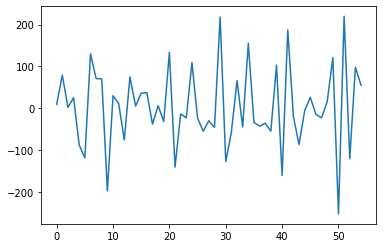

In [ ]:
df3 = df2[2100:2521] 
X = df3.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
	value = X[i] - X[i - days_in_year]
	diff.append(value)
plt.plot(diff)
plt.show()

            diff_soma_1_lag
2018-11-30       -10.000000
2018-12-31         8.333333
2019-01-31       -10.300000
2019-02-28         9.555556
2019-03-31        -0.555556
2019-04-30        -2.125000
2019-05-31        -6.777778
2019-06-30        11.111111
2019-07-31        -2.900000
2019-08-31        -5.800000
2019-09-30        -3.000000
2019-10-31         5.100000
2019-11-30        -2.333333


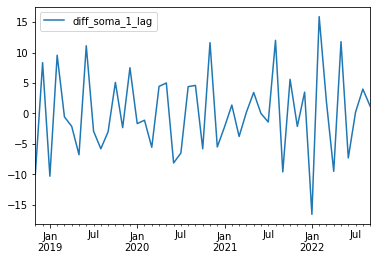

In [ ]:
resample = df3.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(13))
monthly_mean.plot()
plt.show()

In [ ]:
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df3.diff_soma_1_lag.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -9.531607524543377
ADF p-values: 2.880791547416337e-16
ADF number of lags used: 17
ADF number of observations: 402
ADF critical values: {'1%': -3.446722009322339, '5%': -2.868756617175256, '10%': -2.570614247667137}
ADF best information criterion: 4122.799697355691


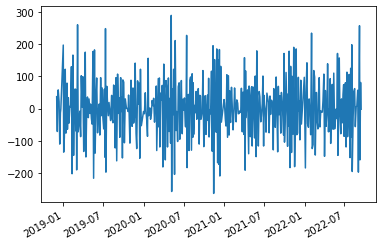

In [ ]:
prev_co2_value = df3.diff_soma_1_lag.shift()
differenced_co2 = df2.diff_soma_1_lag - prev_co2_value
differenced_co2.plot()

In [ ]:
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(differenced_co2.dropna())
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -11.174742615818971
ADF p-values: 2.5876005956294136e-20
ADF number of lags used: 18
ADF number of observations: 400
ADF critical values: {'1%': -3.4468044036406247, '5%': -2.868792838125, '10%': -2.57063355625}
ADF best information criterion: 4179.499009314526


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


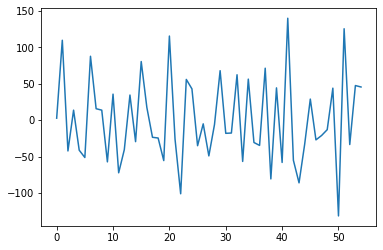

In [ ]:
X = df3.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
	month_str = str(df3.index[i].year-1)+'-'+str(df3.index[i].month)
	month_mean_last_year = df3[month_str].mean()
	value = X[i] - month_mean_last_year
	diff.append(value)
plt.plot(diff)
plt.show()

Coefficients: [[ 4.98204551e-06]
 [-2.84927987e-03]
 [ 3.25156542e-01]]


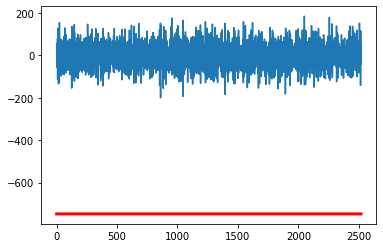

In [ ]:
from numpy import polyfit
series = df2
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 2
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
plt.plot(series.values)
plt.plot(curve, color='red', linewidth=3)
plt.show()

In [ ]:
train, test = train_test_split(df3.diff_soma_1_lag.values, train_size=400)

model = pm.auto_arima(train, seasonal=True, m=7)
preds = model.predict(test.shape[0])

preds

array([-2.65822864e+01, -1.47912233e+00, -2.73861726e+00,  1.02073802e+01,
       -7.23148700e+00,  5.77718097e+00, -3.84465381e+00,  1.79340718e-01,
       -2.06199174e-01,  1.54600351e+00, -1.01873013e+00,  5.45322232e-01,
       -5.18945338e-01,  1.16259432e-01,  3.68470972e-03,  2.06298011e-01,
       -1.59852609e-01,  4.69385255e-02, -6.07407230e-02,  3.23901472e-02])

ValueError: ignored

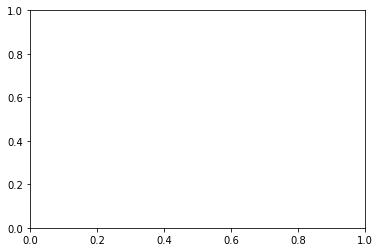

In [ ]:
#x = np.arange(test.shape[0])
